Importing the necessary Visualization Libraries

In [1]:
#Importing the necessary Visualization Libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline
import cufflinks as cf
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

# Importing Sklearn
# Regression
# We import Scikit Learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Importing the dataset

In [3]:
# Importing the dataset
df1 = 'Housing.csv'
# reading the dataset into dataframe
df = pd.read_csv(df1)


In [4]:
# Dropping the column of Unaamed:0
df = df.drop('Unnamed: 0', axis=1)


Let's View the dataset

In [5]:
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


Knowing the basic Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Let's select some features that we want to use for regression.


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Let Visualize cdf using matplotlib

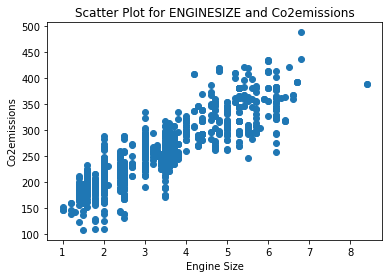

In [13]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel('Engine Size')
plt.ylabel('Co2emissions')
plt.title('Scatter Plot for ENGINESIZE and Co2emissions')
plt.show()


Using plotly express to quickly plot the visulize the cdf dataset

In [14]:
px.scatter(x=cdf.ENGINESIZE,y=cdf.CO2EMISSIONS,
           labels=dict(x='Enginesize',y='Co2emissions'))

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


## Performing Polynomial regression
first creating train and test for each values

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

Using Linear REgresssion to solve it

In [24]:
train_y_ = lm.fit(train_x_poly,train_y)
# Finding the coefficient
print('coefficient =', lm.coef_)
print('intercept =', lm.intercept_)

coefficient = [[ 0.         48.63797747 -1.30997028]]
intercept = [110.78510803]


Text(0, 0.5, 'Emission')

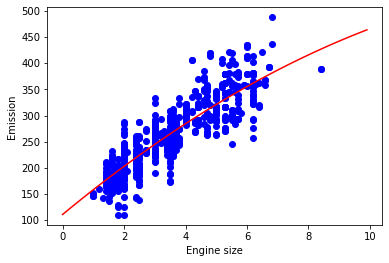

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0] + lm.coef_[0][1]*XX + lm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


using sns library to visualize the reg plot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: 'LinearRegression' object has no attribute 'intercept_'

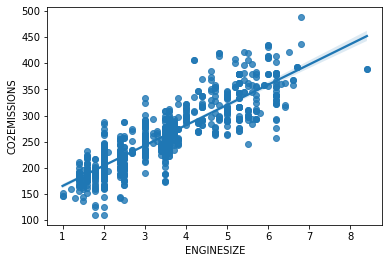

In [17]:
sns.regplot(train.ENGINESIZE, train.CO2EMISSIONS, data=cdf)
plt.plot(lm.intercept_)


Mean Squared Error

In [26]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 20.92
Residual sum of squares (MSE): 772.52
R2-score: 0.79


Finding Mean Absolute Error
R^2
Residual Sum of squares

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y ,test_y_)

20.923740321303757

In [30]:
# immorting math
import math

In [28]:
# Finding mean squared error
mse = sklearn.metrics.mean_squared_error(test_y, test_y_)
mse


772.5196685944002

In [31]:
# finding the root of mean squared errorimport math
rsme = math.sqrt(mse)
rsme


27.794238046659963

In [32]:
# finding r2
r2_score(test_y, test_y_,
         multioutput='variance_weighted')

0.7936507249469326

In [37]:
# finding f1 score 
from sklearn
rrk = sklearn.metrics.f1_score

In [35]:
rrk(test_y,test_y_)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets